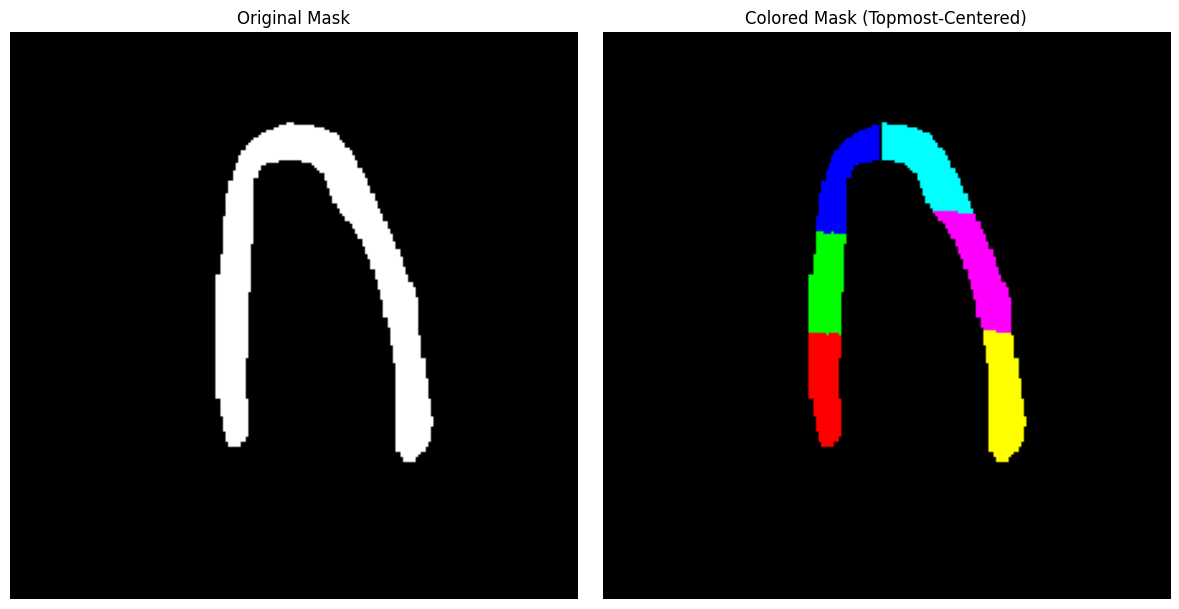

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mask_path = "/kaggle/input/segmentation/data1/decoder_directory_new/mask_0.png" 
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)


ys, xs = np.where(mask == 255)
coords = np.column_stack((xs, ys))

topmost_index = np.argmin(ys)
x_center = xs[topmost_index] 

left_arm = coords[coords[:, 0] < x_center]
right_arm = coords[coords[:, 0] > x_center]


left_sorted = left_arm[np.argsort(left_arm[:, 1])]
right_sorted = right_arm[np.argsort(right_arm[:, 1])]

# Step 6: Define 3 BGR colors for each side
left_colors = [
    [255, 0, 0],     # Blue
    [0, 255, 0],     # Green
    [0, 0, 255],     # Red
]

right_colors = [
    [255, 255, 0],   # Cyan
    [255, 0, 255],   # Magenta
    [0, 255, 255],   # Yellow
]

# Step 7: Create a color mask
color_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

# Step 8: Function to apply 3 color segments
def color_segments(coords_sorted, color_mask, colors):
    n_segments = len(colors)
    segment_size = len(coords_sorted) // n_segments

    for i in range(n_segments):
        start = i * segment_size
        end = (i + 1) * segment_size if i < n_segments - 1 else len(coords_sorted)
        segment = coords_sorted[start:end]
        for x, y in segment:
            color_mask[y, x] = colors[i]

# Step 9: Apply coloring
color_segments(left_sorted, color_mask, left_colors)
color_segments(right_sorted, color_mask, right_colors)

# Step 10: Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Original Mask")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
plt.title("Colored Mask (Topmost-Centered)")
plt.axis("off")

plt.tight_layout()
plt.show()
# Save result
# cv2.imwrite("colored_u_mask_3_left_3_right.png", color_mask)


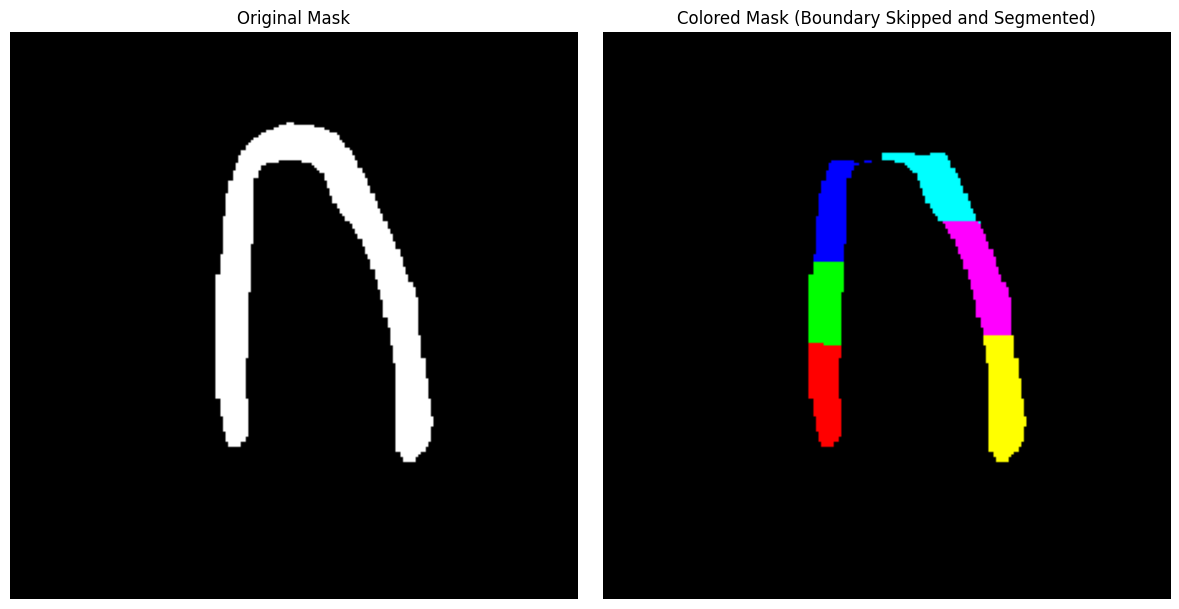

In [2]:


# Step 2: Get all white pixel coordinates
ys, xs = np.where(mask == 255)
coords = np.column_stack((xs, ys))

# Step 3: Find the topmost white pixel (lowest y)
topmost_index = np.argmin(ys)
x_center = xs[topmost_index]  # Use this x as center

# Step 4: Split into left and right arms based on x_center
left_arm = coords[coords[:, 0] < x_center]
right_arm = coords[coords[:, 0] > x_center]

# Step 5: Sort by vertical position (y) top to bottom
left_sorted = left_arm[np.argsort(left_arm[:, 1])]
right_sorted = right_arm[np.argsort(right_arm[:, 1])]

# Step 6: Define 3 BGR colors for each side
left_colors = [
    [255, 0, 0],     # Blue
    [0, 255, 0],     # Green
    [0, 0, 255],     # Red
]

right_colors = [
    [255, 255, 0],   # Cyan
    [255, 0, 255],   # Magenta
    [0, 255, 255],   # Yellow
]

# Step 7: Create a color mask
color_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

# Step 8: Function to apply 3 color segments while skipping 1/7th of the boundary length
def color_segments_with_skip(coords_sorted, color_mask, colors):
    n_segments = len(colors)
    segment_size = len(coords_sorted) // n_segments
    # Calculate boundary length
    total_length = 0
    distances = [0]  # First point has 0 distance

    # Calculate the arc lengths between consecutive points
    for i in range(1, len(coords_sorted)):
        prev = coords_sorted[i - 1]
        curr = coords_sorted[i]
        total_length += np.linalg.norm(curr - prev)
        distances.append(total_length)

    # Skip 1/7th of the boundary length
    skip_len = total_length / 7
    usable_len = total_length - skip_len
    segment_len = usable_len / 3

    # Find the index where we should start coloring
    start_idx = 0
    while start_idx < len(distances) and distances[start_idx] < skip_len:
        start_idx += 1

    # Calculate new segment sizes after skipping
    segments = [[] for _ in range(n_segments)]
    current_length = distances[start_idx]
    i = start_idx
    while i < len(distances) and current_length < total_length:
        segment_index = int((current_length - skip_len) // segment_len)  # Cast to int here
        if segment_index < n_segments:
            segments[segment_index].append(coords_sorted[i])
        current_length = distances[i]
        i += 1

    # Step 9: Assign colors to each segment
    for seg_id, segment in enumerate(segments):
        for x, y in segment:
            color_mask[y, x] = colors[seg_id]

# Step 10: Apply coloring to both left and right segments
color_segments_with_skip(left_sorted, color_mask, left_colors)
color_segments_with_skip(right_sorted, color_mask, right_colors)

# Step 11: Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Original Mask")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
plt.title("Colored Mask (Boundary Skipped and Segmented)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Save result
# cv2.imwrite("colored_u_mask_3_left_3_right.png", color_mask)


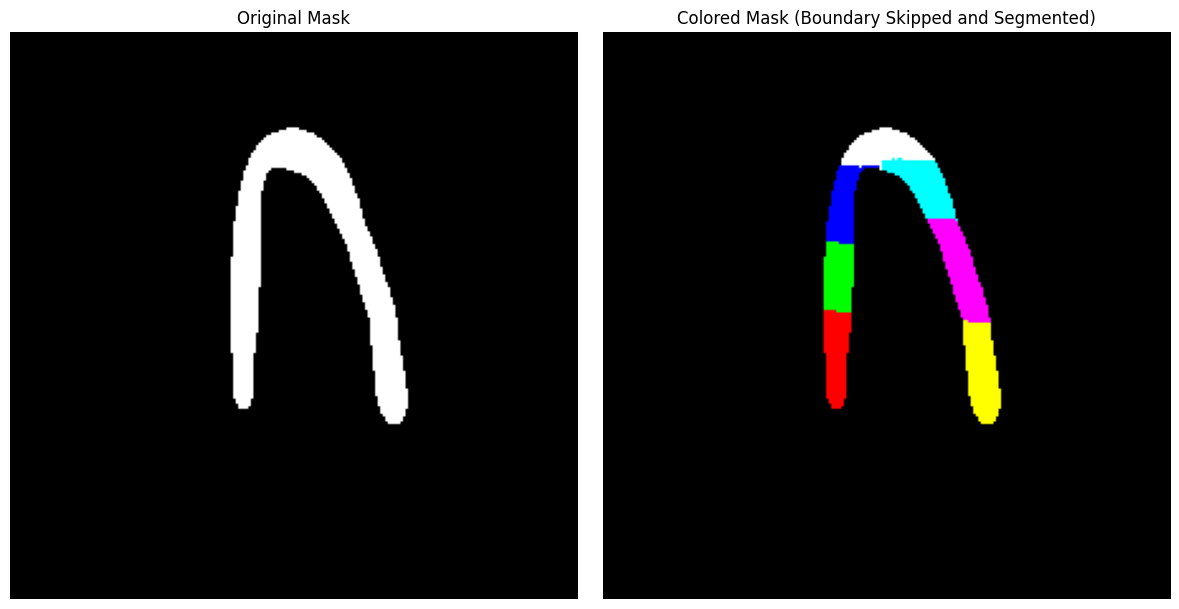

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the binary mask (white shape on black background)
mask_path = "/kaggle/input/segmentation/data1/decoder_directory_new/mask_10.png"  # Replace with your actual path
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Get all white pixel coordinates
ys, xs = np.where(mask == 255)
coords = np.column_stack((xs, ys))

# Step 3: Find the topmost white pixel (lowest y)
topmost_index = np.argmin(ys)
x_center = xs[topmost_index]  # Use this x as center

# Step 4: Split into left and right arms based on x_center
left_arm = coords[coords[:, 0] < x_center]
right_arm = coords[coords[:, 0] > x_center]

# Step 5: Sort by vertical position (y) top to bottom
left_sorted = left_arm[np.argsort(left_arm[:, 1])]
right_sorted = right_arm[np.argsort(right_arm[:, 1])]

# Step 6: Define 3 BGR colors for each side
left_colors = [
    [255, 0, 0],     # Blue
    [0, 255, 0],     # Green
    [0, 0, 255],     # Red
]

right_colors = [
    [255, 255, 0],   # Cyan
    [255, 0, 255],   # Magenta
    [0, 255, 255],   # Yellow
]

# Step 7: Create a color mask, initialized to black
color_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Step 8: Function to apply 3 color segments while skipping 1/7th of the boundary length
def color_segments_with_skip(coords_sorted, color_mask, colors):
    n_segments = len(colors)
    # Calculate boundary length
    total_length = 0
    distances = [0]  # First point has 0 distance

    # Calculate the arc lengths between consecutive points
    for i in range(1, len(coords_sorted)):
        prev = coords_sorted[i - 1]
        curr = coords_sorted[i]
        total_length += np.linalg.norm(curr - prev)
        distances.append(total_length)

    # Skip 1/7th of the boundary length (keep it white)
    skip_len = total_length / 7
    usable_len = total_length - skip_len
    segment_len = usable_len / 3

    # Find the index where we should start coloring
    start_idx = 0
    while start_idx < len(distances) and distances[start_idx] < skip_len:
        start_idx += 1

    # Calculate new segment sizes after skipping
    segments = [[] for _ in range(n_segments)]
    current_length = distances[start_idx]
    i = start_idx
    while i < len(distances) and current_length < total_length:
        segment_index = int((current_length - skip_len) // segment_len)  # Cast to int here
        if segment_index < n_segments:
            segments[segment_index].append(coords_sorted[i])
        current_length = distances[i]
        i += 1

    # Step 9: Assign colors to each segment (only for the white areas)
    for seg_id, segment in enumerate(segments):
        for x, y in segment:
            color_mask[y, x] = colors[seg_id]

# Step 10: Apply coloring to both left and right segments
color_segments_with_skip(left_sorted, color_mask, left_colors)
color_segments_with_skip(right_sorted, color_mask, right_colors)

# Step 11: Plot results
plt.figure(figsize=(12, 6))

# Display original mask
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Original Mask")
plt.axis("off")

# Display colored mask (keeping the skipped part white)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
plt.title("Colored Mask (Boundary Skipped and Segmented)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Save result
# cv2.imwrite("colored_u_mask_3_left_3_right.png", color_mask)


In [4]:
def color_segments_with_skip(coords_sorted, color_mask, colors):
    n_segments = len(colors)
    total_length = 0
    distances = [0]  

    for i in range(1, len(coords_sorted)):
        prev = coords_sorted[i - 1]
        curr = coords_sorted[i]
        total_length += np.linalg.norm(curr - prev)
        distances.append(total_length)

    skip_len = total_length / 7
    usable_len = total_length - skip_len
    segment_len = usable_len / 3

    start_idx = 0
    while start_idx < len(distances) and distances[start_idx] < skip_len:
        start_idx += 1

    # Calculate new segment sizes after skipping
    segments = [[] for _ in range(n_segments)]
    current_length = distances[start_idx]
    i = start_idx
    while i < len(distances) and current_length < total_length:
        segment_index = int((current_length - skip_len) // segment_len)  # Cast to int here
        if segment_index < n_segments:
            segments[segment_index].append(coords_sorted[i])
        current_length = distances[i]
        i += 1

    # Step 9: Assign colors to each segment (only for the white areas)
    for seg_id, segment in enumerate(segments):
        for x, y in segment:
            color_mask[y, x] = colors[seg_id]


In [5]:
# Load grayscale mask
mask_path = "/kaggle/input/segmentation/data1/decoder_directory_new/mask_0.png"
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
print(mask.shape)
# Get colored result
colored_mask = color_u_mask(mask)

# Plot result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.title("Original Mask")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB))
plt.title("Colored U Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


(224, 224)


NameError: name 'color_u_mask' is not defined

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_u_mask(mask):
    ys, xs = np.where(mask == 255)
    coords = np.column_stack((xs, ys))

    topmost_index = np.argmin(ys)
    x_center = xs[topmost_index]  

    left_arm = coords[coords[:, 0] < x_center]
    right_arm = coords[coords[:, 0] > x_center]

    left_sorted = left_arm[np.argsort(left_arm[:, 1])]
    right_sorted = right_arm[np.argsort(right_arm[:, 1])]
   

    left_colors = [
        [255, 0, 0],     # Blue
        [0, 255, 0],     # Green
        [0, 0, 255],     # Red
    ]
    right_colors = [
        [255, 255, 0],   # Cyan
        [255, 0, 255],   # Magenta
        [0, 255, 255],   # Yellow
    ]

    color_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)


    def color_segments_with_skip(coords_sorted, color_mask, colors):
        n_segments = len(colors)
        total_length = 0
        distances = [0]

        for i in range(1, len(coords_sorted)):
            prev = coords_sorted[i - 1]
            curr = coords_sorted[i]
            total_length += np.linalg.norm(curr - prev)
            distances.append(total_length)

        skip_len = 1.5*total_length / 7
        usable_len = total_length - skip_len
        segment_len = usable_len / n_segments

        start_idx = 0
        while start_idx < len(distances) and distances[start_idx] < skip_len:
            start_idx += 1

        segments = [[] for _ in range(n_segments)]
        current_length = distances[start_idx]
        i = start_idx
        while i < len(distances) and current_length < total_length:
            segment_index = int((current_length - skip_len) // segment_len)
            if segment_index < n_segments:
                segments[segment_index].append(coords_sorted[i])
            current_length = distances[i]
            i += 1

        for seg_id, segment in enumerate(segments):
            for x, y in segment:
                color_mask[y, x] = colors[seg_id]

    # Step 8: Apply coloring
    color_segments_with_skip(left_sorted, color_mask, left_colors)
    color_segments_with_skip(right_sorted, color_mask, right_colors)

    return color_mask


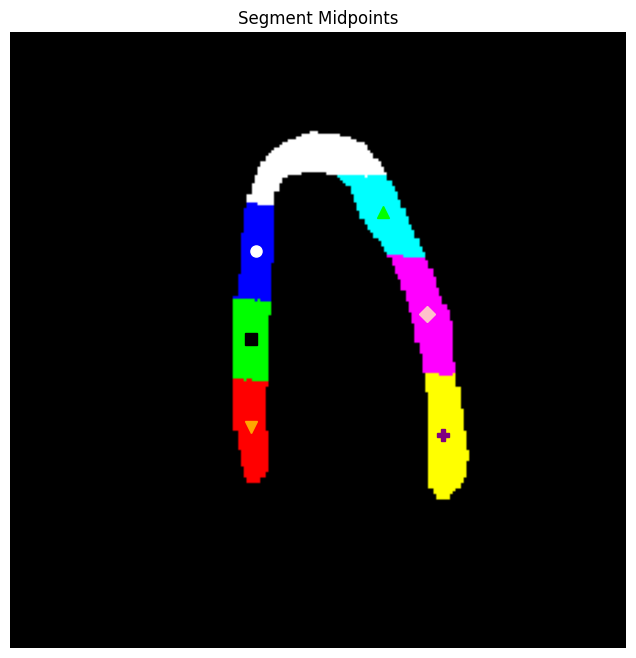

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_segments_with_skip(coords_sorted, color_mask, colors):
    n_segments = len(colors)
    total_length = 0
    distances = [0]

    for i in range(1, len(coords_sorted)):
        prev = coords_sorted[i - 1]
        curr = coords_sorted[i]
        total_length += np.linalg.norm(curr - prev)
        distances.append(total_length)

    skip_len = 1.5 * total_length / 7
    usable_len = total_length - skip_len
    segment_len = usable_len / n_segments

    start_idx = 0
    while start_idx < len(distances) and distances[start_idx] < skip_len:
        start_idx += 1

    segments = [[] for _ in range(n_segments)]
    current_length = distances[start_idx]
    i = start_idx
    while i < len(distances) and current_length < total_length:
        segment_index = int((current_length - skip_len) // segment_len)
        if segment_index < n_segments:
            segments[segment_index].append(coords_sorted[i])
        current_length = distances[i]
        i += 1

    for seg_id, segment in enumerate(segments):
        for x, y in segment:
            color_mask[y, x] = colors[seg_id]

def get_segment_midpoints(color_mask, segment_colors):
    midpoints = []

    for color in segment_colors:
        color_arr = np.array(color, dtype=np.uint8)
        color_pixels = np.all(color_mask == color_arr, axis=-1)

        ys, xs = np.where(color_pixels)
        if len(xs) == 0 or len(ys) == 0:
            midpoints.append(None)
            continue

        x_mean = int(np.mean(xs))
        y_mean = int(np.mean(ys))
        midpoints.append((x_mean, y_mean))

    return midpoints

def color_u_mask(mask):
    ys, xs = np.where(mask == 255)
    coords = np.column_stack((xs, ys))

    topmost_index = np.argmin(ys)
    x_center = xs[topmost_index]

    left_arm = coords[coords[:, 0] < x_center]
    right_arm = coords[coords[:, 0] > x_center]

    left_sorted = left_arm[np.argsort(left_arm[:, 1])]
    right_sorted = right_arm[np.argsort(right_arm[:, 1])]

    left_colors = [
        [255, 0, 0],     # Blue
        [0, 255, 0],     # Green
        [0, 0, 255],     # Red
    ]
    right_colors = [
        [255, 255, 0],   # Cyan
        [255, 0, 255],   # Magenta
        [0, 255, 255],   # Yellow
    ]

    color_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    color_segments_with_skip(left_sorted, color_mask, left_colors)
    color_segments_with_skip(right_sorted, color_mask, right_colors)

    segment_colors = left_colors + right_colors
    midpoints = get_segment_midpoints(color_mask, segment_colors)

    # Distinct markers for each segment midpoint
    marker_styles = ['o', 's', 'v', '^', 'D', 'P']
    marker_colors = ['white', 'black', 'orange', 'lime', 'pink', 'purple']

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
    ax.set_title("Segment Midpoints")

    for i, pt in enumerate(midpoints):
        if pt is None:
            continue
        x, y = pt
        ax.plot(x, y, marker=marker_styles[i], markersize=8, color=marker_colors[i])

    ax.axis("off")
    plt.show()

    return color_mask

# --- Load your binary mask ---
mask = cv2.imread('/kaggle/input/segmentation/data1/decoder_directory_new/mask_0.png', cv2.IMREAD_GRAYSCALE)

# Process and visualize
colored_mask = color_u_mask(mask)


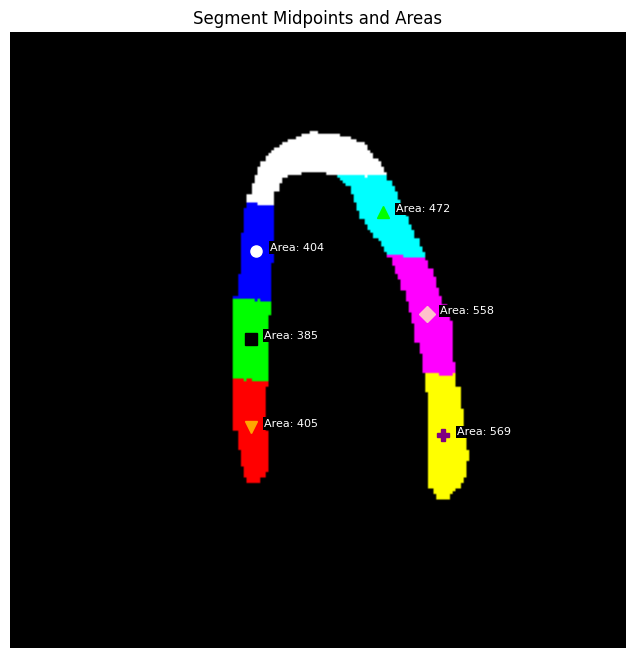

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_segment_midpoints(color_mask, segment_colors):
    midpoints = []

    for color in segment_colors:
        color_arr = np.array(color, dtype=np.uint8)
        color_pixels = np.all(color_mask == color_arr, axis=-1)

        ys, xs = np.where(color_pixels)
        if len(xs) == 0 or len(ys) == 0:
            midpoints.append(None)
            continue

        x_mean = int(np.mean(xs))
        y_mean = int(np.mean(ys))
        midpoints.append((x_mean, y_mean))

    return midpoints

# Function to calculate areas of segments
def get_segment_areas(color_mask, segment_colors):
    areas = []

    for color in segment_colors:
        color_arr = np.array(color, dtype=np.uint8)
        color_pixels = np.all(color_mask == color_arr, axis=-1)

        ys, xs = np.where(color_pixels)
        area = len(xs)  # Area is the number of pixels of this color
        areas.append(area)

    return areas

# Function to color the U-shaped mask and find midpoints and areas
def color_u_mask(mask):
    ys, xs = np.where(mask == 255)
    coords = np.column_stack((xs, ys))

    topmost_index = np.argmin(ys)
    x_center = xs[topmost_index]

    left_arm = coords[coords[:, 0] < x_center]
    right_arm = coords[coords[:, 0] > x_center]

    left_sorted = left_arm[np.argsort(left_arm[:, 1])]
    right_sorted = right_arm[np.argsort(right_arm[:, 1])]

    left_colors = [
        [255, 0, 0],     # Blue
        [0, 255, 0],     # Green
        [0, 0, 255],     # Red
    ]
    right_colors = [
        [255, 255, 0],   # Cyan
        [255, 0, 255],   # Magenta
        [0, 255, 255],   # Yellow
    ]

    color_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    color_segments_with_skip(left_sorted, color_mask, left_colors)
    color_segments_with_skip(right_sorted, color_mask, right_colors)

    segment_colors = left_colors + right_colors
    
    # Get midpoints and areas
    midpoints = get_segment_midpoints(color_mask, segment_colors)
    areas = get_segment_areas(color_mask, segment_colors)

    # Distinct markers for each segment
    marker_styles = ['o', 's', 'v', '^', 'D', 'P']
    marker_colors = ['white', 'black', 'orange', 'lime', 'pink', 'purple']

    # Plotting the results
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
    ax.set_title("Segment Midpoints and Areas")

    for i, (midpoint, area) in enumerate(zip(midpoints, areas)):
        if midpoint is None:
            continue
        x, y = midpoint
        ax.plot(x, y, marker=marker_styles[i], markersize=8, color=marker_colors[i])
        ax.text(x + 5, y, f"Area: {area}", fontsize=8, color='white',
                bbox=dict(facecolor='black', edgecolor='none', pad=1))

    ax.axis("off")
    plt.show()

    return color_mask

# --- Load your binary mask ---
mask = cv2.imread('/kaggle/input/segmentation/data1/decoder_directory_new/mask_0.png', cv2.IMREAD_GRAYSCALE)

# Process and visualize
colored_mask = color_u_mask(mask)


In [9]:
def extract_colored_inner_lining(color_mask):
    left_colors = [
        [255, 0, 0],     
        [0, 255, 0],     # Green
        [0, 0, 255],     # Red
    ]
    right_colors = [
        [255, 255, 0],  
        [255, 0, 255],   
        [0, 255, 255],  
    ]

    inner_lining_mask = np.zeros_like(color_mask)

    for i in left_colors:
        coord=traverse_right(i, color_mask)
        for x, y in coord:
            inner_lining_mask[x, y] = i

    for i in right_colors:
        coord=traverse_left(i, color_mask)
        for x, y in coord:
            inner_lining_mask[x, y] = i
    return inner_lining_mask


In [10]:
def traverse_left(colour, mask):
    coord = []
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if np.array_equal(mask[i][j], colour):
                coord.append([i, j])
                break
    return coord

def traverse_right(colour, mask):
    coord = []
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]-1, -1, -1):
            if np.array_equal(mask[i][j], colour):
                coord.append([i, j])
                break
    return coord

def traverse_up(colour, mask):
    coord = []
    for j in range(mask.shape[1]):
        for i in range(mask.shape[0]):
            if np.array_equal(mask[i][j], colour):
                coord.append([i, j])
                break
    return coord


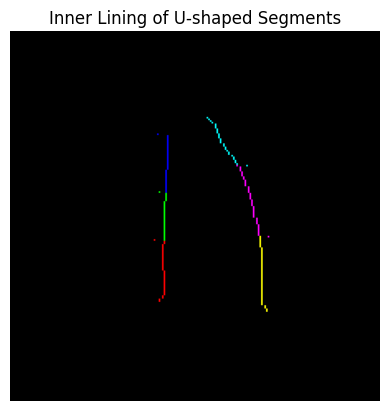

In [11]:
inner_lining = extract_colored_inner_lining(colored_mask)

# Display result
plt.imshow(cv2.cvtColor(inner_lining, cv2.COLOR_BGR2RGB))
plt.title("Inner Lining of U-shaped Segments")
plt.axis("off")
plt.show()

In [12]:
def overlay_image(base, overlay, alpha=1.0):
    if base.shape != overlay.shape:
        raise ValueError("Base and overlay images must be the same shape.")
    base = base.astype(np.float32)
    overlay = overlay.astype(np.float32)
    combined = cv2.addWeighted(overlay, alpha, base, 1 - alpha, 0)
    return combined.astype(np.uint8)


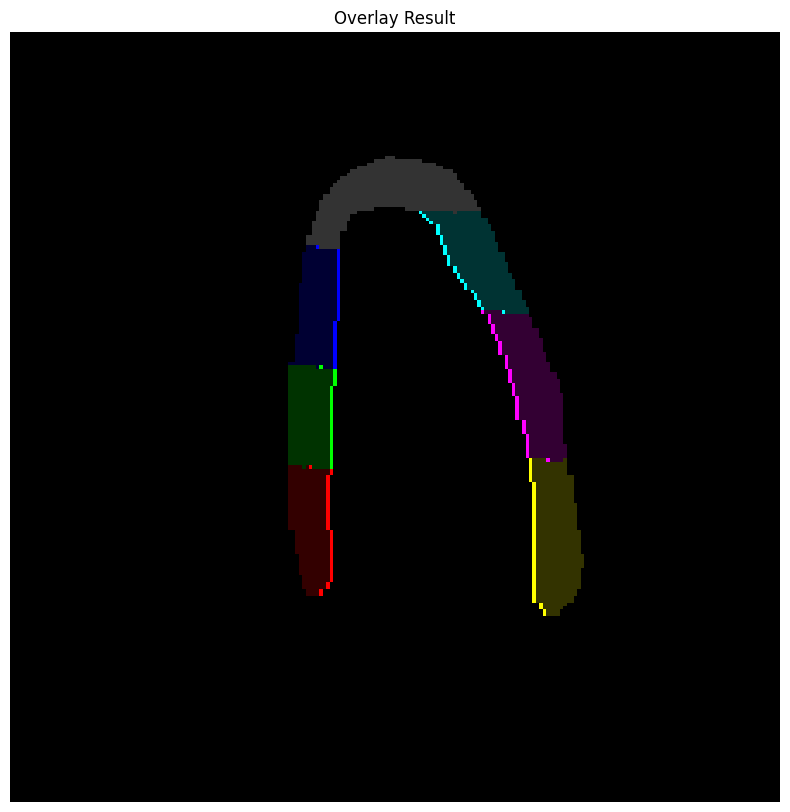

In [16]:
# base: original image or mask
# overlay: inner lining or segments image
result = overlay_image(colored_mask, inner_lining, alpha=0.8)
plt.figure(figsize=(16, 10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Overlay Result")
plt.show()
